# Pytorch Neural Networks Architectures, Training and Evaluation 
# on MNIST dataset

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])


training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

In [3]:
for x, target in iter(training_loader):
    print(target)
    print(x.shape)
    break

tensor([7, 8, 6, 8, 4, 9, 8, 8, 8, 4, 6, 0, 3, 9, 3, 6, 5, 3, 0, 9, 1, 1, 9, 9,
        0, 3, 8, 4, 1, 2, 4, 9, 6, 2, 4, 9, 8, 0, 7, 6, 9, 8, 5, 1, 3, 0, 2, 3,
        9, 0, 7, 1, 6, 4, 0, 0, 0, 1, 1, 2, 9, 7, 1, 2, 8, 8, 1, 7, 3, 9, 7, 1,
        6, 1, 6, 1, 4, 4, 9, 0, 6, 5, 3, 3, 2, 3, 2, 0, 5, 7, 2, 1, 2, 5, 5, 4,
        5, 5, 5, 1])
torch.Size([100, 1, 28, 28])


In [4]:
for x, target in iter(validation_loader):
    print(target.shape)
    print(x.shape)
    break

torch.Size([100])
torch.Size([100, 1, 28, 28])


Mer im_convert function@ zut grelenq nra hamar vor karenanq plot anenq mer imagener@ vortev mathplotlibov tensor image ner@ chenq kara patkerenq u mer es funkciani arachi toxov henc asenq sarqumenq tensor image i ira numpy array@. 3 rd toxum denormalize anum vor mer irakan imagener@ tpenq dra hamar bazmapatkumenq std ov u saxin mean@ gumarum. Isk image clip@ nra hamarenq anum vortev normalizationic heto bereleinq -1 1 i ( -1 1i vortev  ete mean = 0.5 std = 0.5 sax valuener@ @ngnumen -1,1 mijakayqum 

In [5]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)     # 1,2, vor lini 28x28x1 shape i nkar isk mer mot 1x28x28 er indexnernenq poxum
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))  # denormalization part na es mean = 0.5 std = 0.5
    image = image.clip(0, 1)             # clip from [-1,1] to [0,1]
    return image

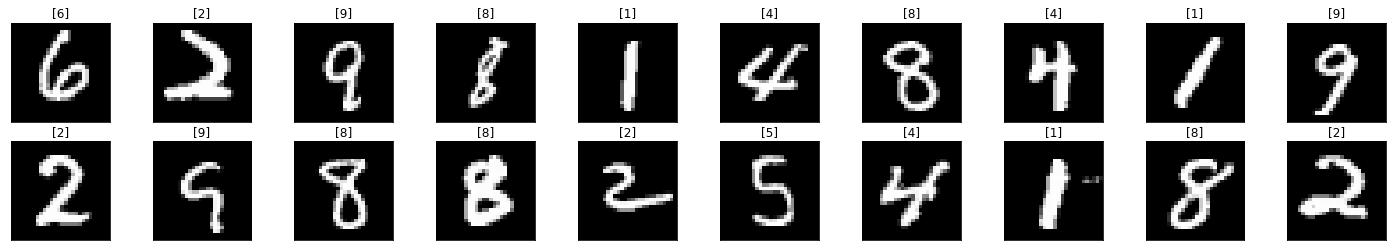

In [6]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])
  

In [7]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))  
        x = F.relu(self.linear2(x))
        x = F.softmax(self.linear3(x))
        return x

In [8]:
class MyNetBN(nn.Module):
    def __init__(self): 
        super(MyNetBN, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 125),
            nn.BatchNorm1d(125), #applying batch norm
            nn.ReLU(),
            nn.Linear(125, 65),
            nn.BatchNorm1d(65),
            nn.ReLU(),
            nn.Linear(65, 10)
        )
             
    def forward(self, x):
        x = x.view(x.size(0), -1)   # first argument is batch which in our case is 100 
        x = self.classifier(x)
        return x

In [28]:
class SimpleDenseNet(nn.Module):
    def __init__(self):
       
        super(SimpleDenseNet, self).__init__()
        
        self.fc1 = nn.Linear(784, 125)
        self.batch_norm1 = nn.BatchNorm1d(125)
        self.fc2 = nn.Linear(125, 125)
        self.fc3 = nn.Linear(125, 65)
        self.dropout = nn.Dropout(0.5)
        self.last_layer = nn.Linear(65, 10)
        #self.sigm = nn.Sigmoid()
        
    def forward(self, x):

        x = x.view(x.shape[0], -1) 
        x = F.relu(self.fc1(x))
        x = self.batch_norm1( F.relu(self.fc2(x)) )
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.softmax(self.last_layer(x))
        
        return x

In [10]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [11]:
model2 = MyNetBN()
model2

MyNetBN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=125, bias=True)
    (1): BatchNorm1d(125, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=125, out_features=65, bias=True)
    (4): BatchNorm1d(65, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=65, out_features=10, bias=True)
  )
)

In [29]:
model3 = SimpleDenseNet()
model3

SimpleDenseNet(
  (fc1): Linear(in_features=784, out_features=125, bias=True)
  (batch_norm1): BatchNorm1d(125, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=125, out_features=125, bias=True)
  (fc3): Linear(in_features=125, out_features=65, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (last_layer): Linear(in_features=65, out_features=10, bias=True)
)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [17]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
  
    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)     # flatten annenq vor 28x28@ darna 784
        outputs = model(inputs)                      # predict using the model class
        loss = criterion(outputs, labels)           # calculate the loss
    
        optimizer.zero_grad()                       # make the gradients zero so as to not accumulate
        loss.backward()                             # backward is to calculate the gradients
        optimizer.step()                            # update the weights using the step fucntion 
    
        _, preds = torch.max(outputs, 1)            # torch max@ veradarcnuma tuple 1 in@ softmaxi score na isk 2 rd@
                                                    # en classi index@ vor maximumna, mer mot de tvera stacvuma ete 0 i softmax
                                                    # score na amenamec@ kveradarcni 0 index@ u heto sranov karanq loss hashvenq
        running_loss += loss.item()                 # running loss@ avelacnumenq vor batch size i loss@ karenaq hashvenq
        running_corrects += torch.sum(preds == labels.data)  # correctne te amen batchum nkarneric qanisna chisht gushakum

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)   # flattten
                val_outputs = model(val_inputs)                         # predict
                val_loss = criterion(val_outputs, val_labels)           # calculate loss

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()                                # add up validation loss
                val_running_corrects += torch.sum(val_preds == val_labels.data)    # calcualte the exact number of correct predictions

            epoch_loss = running_loss/len(training_loader)             # hashvumenq amen epoch ic heto loss@ 
            epoch_acc = running_corrects.float()/ len(training_loader) # hashvumenq te batch size 100 hatic vor tokosna chisht gushake
            running_loss_history.append(epoch_loss)                    # list i mech append enq anum heto vor karenanq plt ov nkarenq
            running_corrects_history.append(epoch_acc)                 # eli listi mech append anenq vor heto karenanq tpenq

            val_epoch_loss = val_running_loss/len(validation_loader) # stex hashvum enq amen batch i loss@
            val_epoch_acc = val_running_corrects.float()/ len(validation_loader) # hashvumenq accuracy n  
            val_running_loss_history.append(val_epoch_loss)
            val_running_corrects_history.append(val_epoch_acc)
            print('epoch :', (e+1))                                   # e + 1 vor 0 i tex@ 1 i epochic sksi tpel sax
            print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
            print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

C:\Users\Arman\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()
..\torch\csrc\utils\python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)


epoch : 1
training loss: 1.9166, acc 60.4533 
validation loss: 1.7191, validation acc 79.3200 
epoch : 2
training loss: 1.6726, acc 82.5700 
validation loss: 1.5996, validation acc 89.5900 
epoch : 3
training loss: 1.5894, acc 89.7850 
validation loss: 1.5702, validation acc 90.8500 
epoch : 4
training loss: 1.5710, acc 90.6283 
validation loss: 1.5614, validation acc 91.3200 
epoch : 5
training loss: 1.5622, acc 91.1550 
validation loss: 1.5553, validation acc 91.6700 


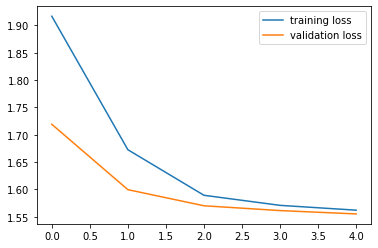

In [18]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

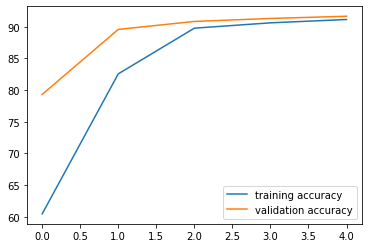

In [19]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
!pip3 install pillow==4.0.0

In [22]:
import PIL.ImageOps

Es galiq toxerov zut internetic url ov inch vor image enq vercnum u test anum te mer model@ incha output anum 

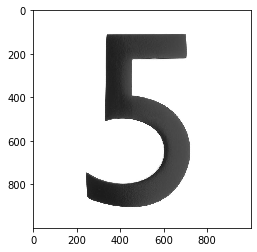

In [20]:
import requests
from PIL import Image

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

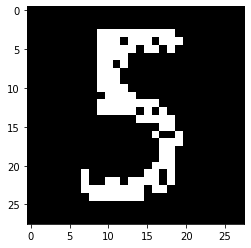

In [23]:
img = PIL.ImageOps.invert(img)  # invert anel aysinnq sev spitaki tex@ poxel vortev mer mot modelum tver@ spitaken background@ sev
img = img.convert('1')          # es toxov asuma mer nkar@ 3 chanellanoca webum poxenq 1 chanelanoc nkari 
img = transform(img)            # transform anenq mer uzaci size i vor model@ vren ashxatacnenq
plt.imshow(im_convert(img))

In [24]:
img = img.view(img.shape[0], -1)     # skzbic eli flatten anenq vor tanq mer modelin predict anelu hamar 
output = model(img)                  # predict
_, pred = torch.max(output, 1)       # get the maximum index after softmax last layer activation
print(pred.item())

5


C:\Users\Arman\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


C:\Users\Arman\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


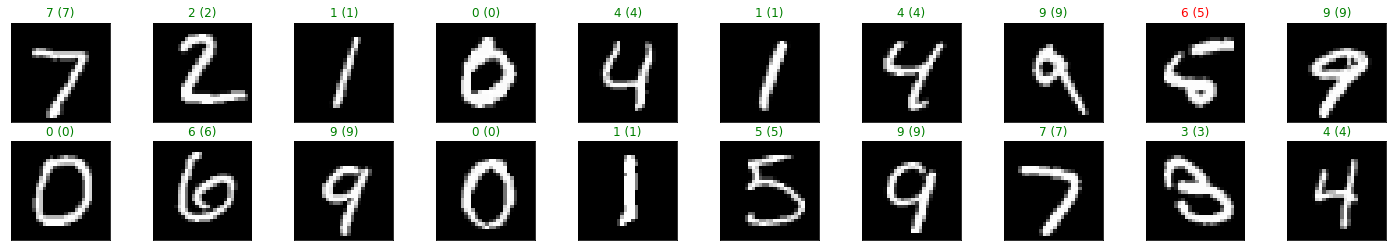

In [25]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))

In [34]:
# for name, param in model2.named_parameters():
#     if param.requires_grad:
#         print(name, param.data)
#         break

classifier.0.weight tensor([[ 0.0169,  0.0300, -0.0272,  ..., -0.0223,  0.0304, -0.0219],
        [ 0.0002, -0.0162, -0.0136,  ..., -0.0096,  0.0132,  0.0064],
        [ 0.0003,  0.0198,  0.0113,  ...,  0.0078, -0.0071,  0.0027],
        ...,
        [ 0.0345, -0.0160, -0.0298,  ...,  0.0250,  0.0185,  0.0352],
        [-0.0154,  0.0190,  0.0205,  ...,  0.0099,  0.0237,  0.0043],
        [ 0.0285,  0.0319,  0.0018,  ..., -0.0242,  0.0260,  0.0208]])


In [36]:
# for param in model2.parameters():
#     print(param)
#     break

In [26]:
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

from tqdm import tqdm, tqdm_notebook
from sklearn.metrics import accuracy_score

for epoch in tqdm_notebook(range(5)):

    running_loss = 0.0
    y_preds = []
    y_reals = []
    
    model2.train()
    
    for x_batch, y_batch in training_loader:
        optimizer.zero_grad()
        y_pred = model2(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
            
    print('epoch', epoch)
    
    model2.eval()                       # model.eval() will notify all your layers that you are in eval mode,
                                        # that way, batchnorm or dropout layers will work in eval mode instead of training mode.
                                        # model eval in batch norm during train and eval difference
                                        # During training, this layer keeps a running estimate of its computed mean and variance. 
                                        # During evaluation, this running mean/variance is used for normalization.
    
    print('Running Loss:', running_loss)
    
    for x_batch, y_batch in training_loader:

        y_pred = model2(x_batch)
        _, predicted = torch.max(y_pred.data, 1)

        for p, y in zip(y_batch, predicted):
            y_preds.append(p)
            y_reals.append(y)

    print('Accuracy in train:', accuracy_score(y_preds, y_reals))

    y_preds = []
    y_reals = []


    for x_batch, y_batch in validation_loader:

        y_pred = model2(x_batch)
        _, predicted = torch.max(y_pred.data, 1)

        for p, y in zip(y_batch, predicted):
            y_preds.append(p)
            y_reals.append(y)

    print('Accuracy in test:', accuracy_score(y_preds, y_reals))        

C:\Users\Arman\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch 0
Running Loss: 169.24727439507842
Accuracy in train: 0.9724833333333334
Accuracy in test: 0.9665
epoch 1
Running Loss: 56.40829891897738
Accuracy in train: 0.98415
Accuracy in test: 0.9753
epoch 2
Running Loss: 38.02910435851663
Accuracy in train: 0.9875833333333334
Accuracy in test: 0.9749
epoch 3
Running Loss: 29.09111963957548
Accuracy in train: 0.9893833333333333
Accuracy in test: 0.9752
epoch 4
Running Loss: 21.695683086989447
Accuracy in train: 0.9929833333333333
Accuracy in test: 0.9758



In [32]:
next(model3.parameters())

Parameter containing:
tensor([[-0.0022,  0.0344,  0.0329,  ..., -0.0153,  0.0121,  0.0311],
        [ 0.0374, -0.0102,  0.0285,  ...,  0.0205, -0.0151,  0.0388],
        [ 0.0410, -0.0111,  0.0104,  ...,  0.0161,  0.0186,  0.0116],
        ...,
        [-0.0137, -0.0138, -0.0040,  ...,  0.0242, -0.0051,  0.0178],
        [ 0.0330, -0.0016, -0.0188,  ...,  0.0046,  0.0342,  0.0237],
        [-0.0060,  0.0420,  0.0302,  ...,  0.0092,  0.0436,  0.0296]],
       requires_grad=True)

In [30]:
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)

from tqdm import tqdm, tqdm_notebook
from sklearn.metrics import accuracy_score

for epoch in tqdm_notebook(range(5)):

    running_loss = 0.0
    y_preds = []
    y_reals = []
    
    model3.train()
    
    for x_batch, y_batch in training_loader:
        optimizer.zero_grad()
        y_pred = model3(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
            
    print('epoch', epoch)
    model3.eval()
    print('Running Loss:', running_loss)
    
    for x_batch, y_batch in training_loader:

        y_pred = model3(x_batch)
        _, predicted = torch.max(y_pred.data, 1)

        for p, y in zip(y_batch, predicted):
            y_preds.append(p)
            y_reals.append(y)

    print('Accuracy in train:', accuracy_score(y_preds, y_reals))

    y_preds = []
    y_reals = []


    for x_batch, y_batch in validation_loader:

        y_pred = model3(x_batch)
        _, predicted = torch.max(y_pred.data, 1)

        for p, y in zip(y_batch, predicted):
            y_preds.append(p)
            y_reals.append(y)

    print('Accuracy in test:', accuracy_score(y_preds, y_reals))

C:\Users\Arman\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


C:\Users\Arman\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0
Running Loss: 990.0813474655151
Accuracy in train: 0.8552333333333333
Accuracy in test: 0.8629
epoch 1
Running Loss: 936.1334216594696
Accuracy in train: 0.92485
Accuracy in test: 0.9242
epoch 2
Running Loss: 926.8908994197845
Accuracy in train: 0.9326666666666666
Accuracy in test: 0.9285
epoch 3
Running Loss: 922.4900561571121
Accuracy in train: 0.9368666666666666
Accuracy in test: 0.9345
epoch 4
Running Loss: 919.9849103689194
Accuracy in train: 0.9299666666666667
Accuracy in test: 0.9262

